# Testing `physiokinematic` models
Trey Wenger - September 2024

In [ ]:
from physiokinematic.simulate import simulate
# Generate synthetic dataset
data = simulate(100, seed=1234)

In [ ]:
data

,glong,glat,vlsr,e_vlsr,radius,true_te,te,e_te,line,e_line,...,line_freq,telescope,beam_area,Rgal,distance,log10_n,log10_q,log10_Rs,log10_em,kdar
0,224.155771,2.075929,25.382395,1.0,163.920912,6774.609351,NaN,100.0,12.436065,0.1,...,8000.0,simulated,9178.029287,9.732297,2.039377,1.681512,47.558143,0.209706,3.873760,
1,25.697834,0.115207,-34.076411,1.0,48.477137,6197.743804,6197.743804,100.0,1.936492,0.1,...,8000.0,simulated,9178.029287,11.820265,18.635783,1.296064,48.082505,0.641459,3.534617,
2,237.333227,-0.484440,83.502886,1.0,282.857187,7210.781999,NaN,100.0,13.076663,0.1,...,8000.0,simulated,9178.029287,13.873893,7.643733,1.310861,49.249063,1.020447,3.943199,
3,28.063378,1.200047,82.839998,1.0,92.354836,4760.477527,NaN,100.0,14.740318,0.1,...,8000.0,simulated,9178.029287,4.543586,9.634060,1.371119,48.212769,0.634843,3.678112,
4,46.278735,0.182671,-97.549184,1.0,48.550848,8908.522465,NaN,100.0,3.425202,0.1,...,8000.0,simulated,9178.029287,18.269627,22.934216,1.516107,48.794979,0.732255,4.065499,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,250.681594,-0.509904,124.531810,1.0,23.567184,9270.951747,9270.951747,100.0,0.218938,0.1,...,8000.0,simulated,9178.029287,18.060085,13.632515,1.482954,47.109281,0.192458,3.459395,
96,34.238475,0.417497,-56.085226,1.0,55.134088,7529.102223,NaN,100.0,9.796952,0.1,...,8000.0,simulated,9178.029287,13.735466,19.695626,1.628485,48.987063,0.721364,4.279364,
97,303.020363,-0.323503,-6.087848,1.0,79.783612,6395.973831,6395.973831,100.0,10.551657,0.1,...,8000.0,simulated,9178.029287,7.947578,8.485254,1.521567,48.157594,0.516153,3.860318,
98,241.244960,1.837653,48.904231,1.0,279.005593,7159.200749,NaN,100.0,6.921645,0.1,...,8000.0,simulated,9178.029287,10.650207,3.958799,1.316563,48.385379,0.728751,3.662908,


In [4]:
from physiokinematic.NEWmodel import model as pkmodel
# setup model
model = pkmodel(data)

ModuleNotFoundError: No module named 'physiokinematic.NEWmodel'

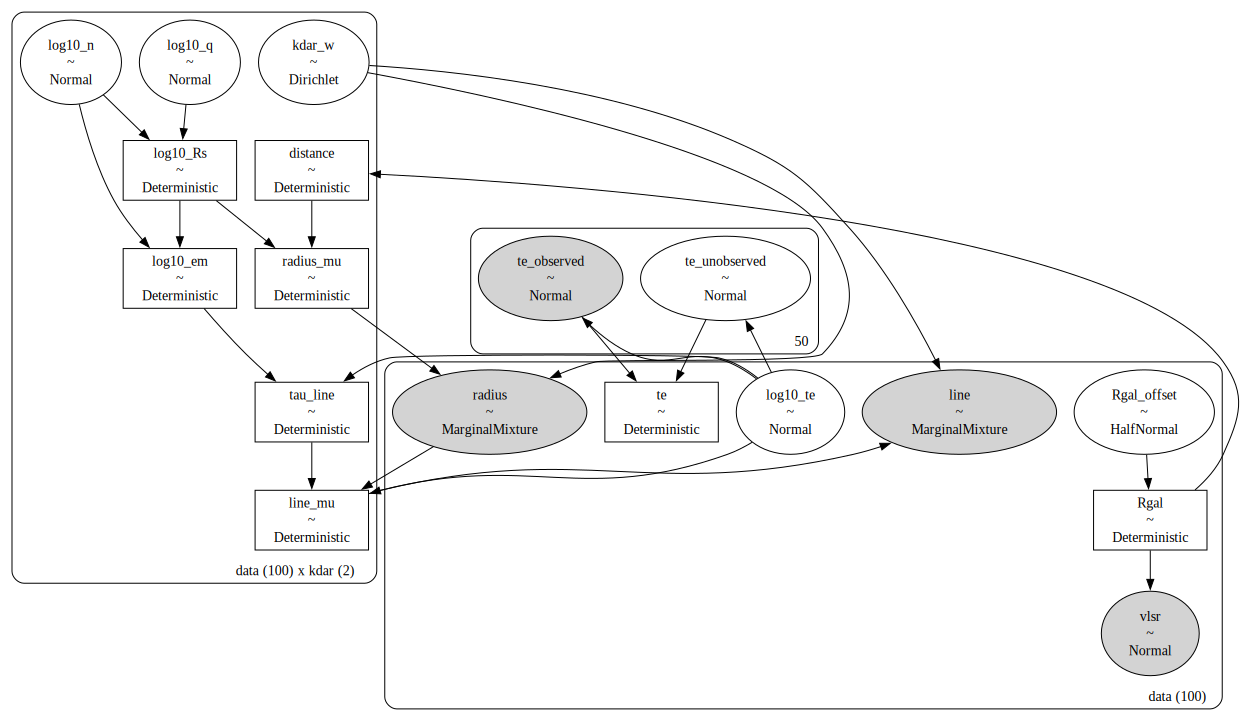

In [ ]:
# visualize model
model.to_graphviz()

In [ ]:
import pymc as pm

# sample prior predictive
with model:
    prior = pm.sample_prior_predictive(1000)

Sampling: [Rgal_offset, kdar_w, line, log10_n, log10_q, log10_te, radius, te_observed, te_unobserved, vlsr]


(360.0, 0.0)

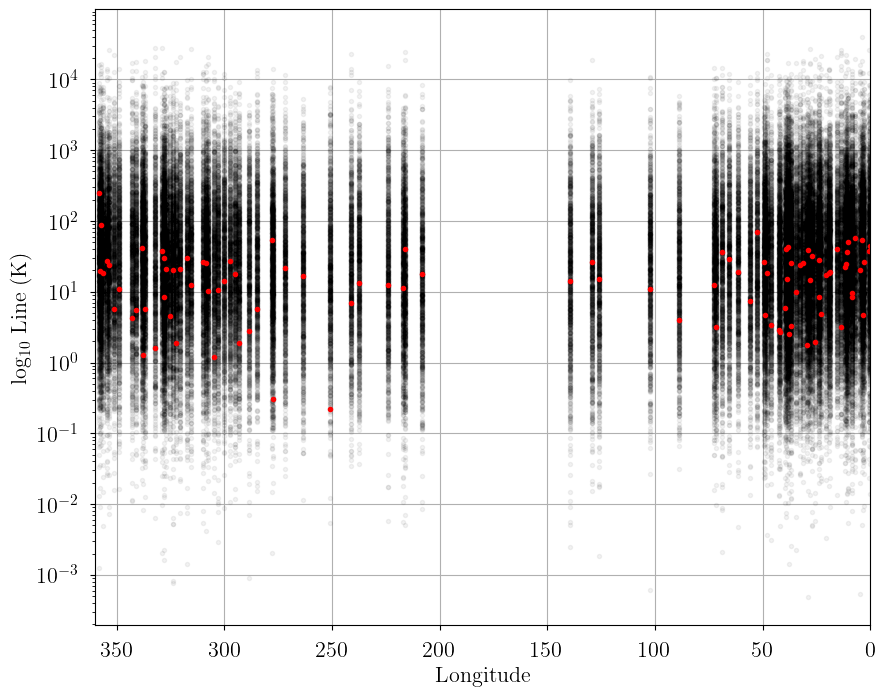

In [ ]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots(figsize=(10, 8))
for draw in prior.prior_predictive.draw:
    ax.plot(
        data["glong"],
        prior.prior_predictive["line"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["line"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("log$_{10}$ Line (K)")
ax.set_yscale("log")
ax.set_xlim(360.0, 0.0)

(360.0, 0.0)

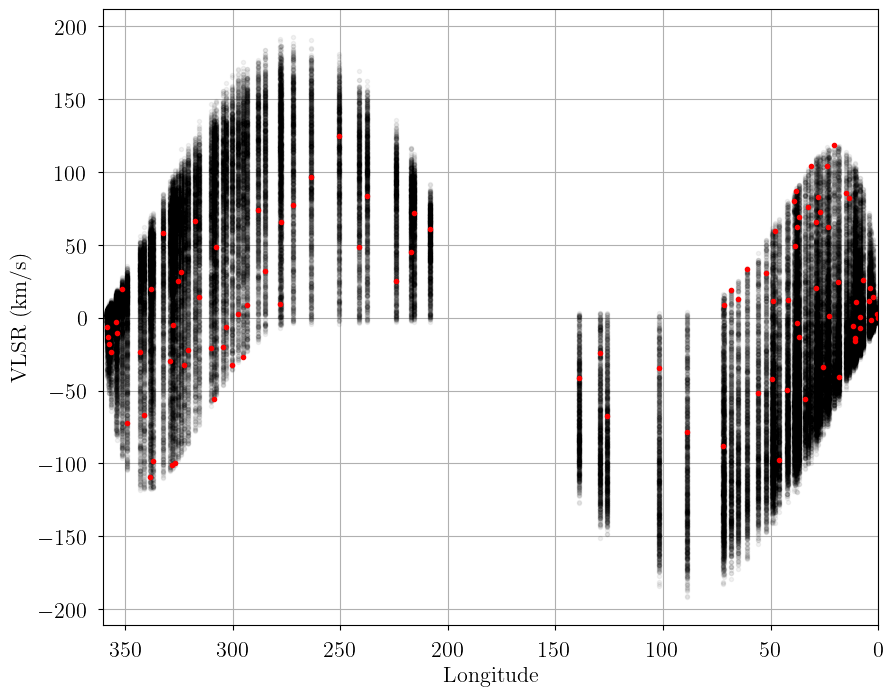

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in prior.prior_predictive.draw:
    ax.plot(
        data["glong"],
        prior.prior_predictive["vlsr"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["vlsr"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("VLSR (km/s)")
ax.set_xlim(360.0, 0.0)

(360.0, 0.0)

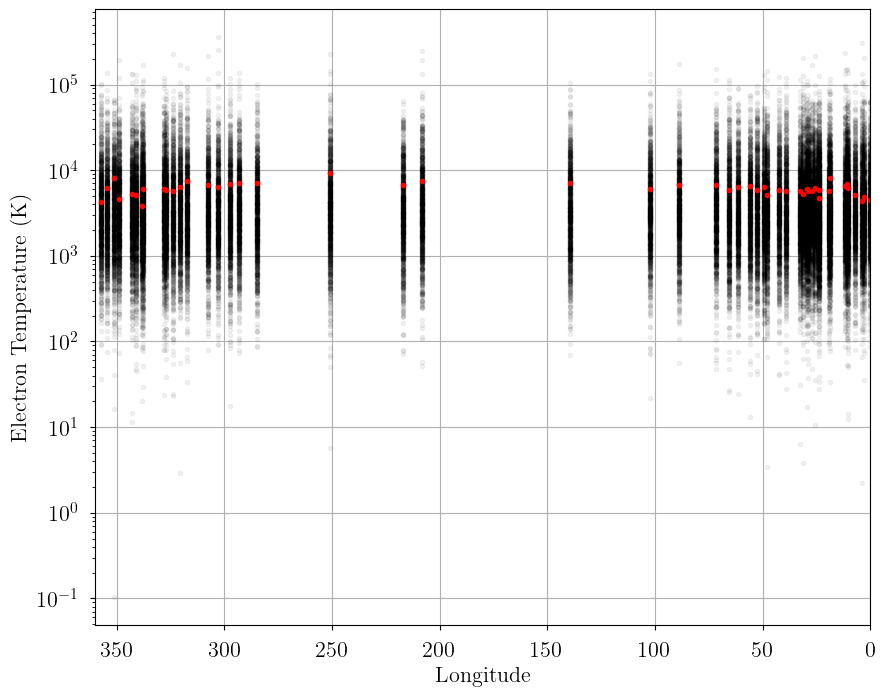

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in prior.prior_predictive.draw:
    ax.plot(
        data.loc[~data["te"].isna(), "glong"],
        prior.prior_predictive["te_observed"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["te"], "r.")
ax.set_yscale('log')
ax.set_xlabel("Longitude")
ax.set_ylabel("Electron Temperature (K)")
ax.set_xlim(360.0, 0.0)

In [ ]:
# sample posterior
with model:
    trace = pm.sample(chains=8, cores=8, tune=1000, draws=1000, target_accept=0.85)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [Rgal_offset, log10_te, te_unobserved, kdar_w, log10_q, log10_n]


Output()

Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 1608 seconds.
There were 2210 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 5 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 6 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 7 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for detail

In [ ]:
 pm.summary(trace, var_names=['kdar_w'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"kdar_w[0, N]",0.358,0.266,0.037,0.875,0.072,0.058,20.0,14.0,1.79
"kdar_w[0, F]",0.642,0.266,0.125,0.963,0.072,0.052,20.0,14.0,1.79
"kdar_w[1, N]",0.325,0.238,0.001,0.714,0.053,0.038,26.0,223.0,1.22
"kdar_w[1, F]",0.675,0.238,0.286,0.999,0.053,0.039,26.0,223.0,1.22
"kdar_w[2, N]",0.380,0.198,0.001,0.657,0.032,0.023,42.0,229.0,1.23
...,...,...,...,...,...,...,...,...,...
"kdar_w[97, F]",0.634,0.266,0.129,0.963,0.074,0.053,17.0,13.0,1.55
"kdar_w[98, N]",0.314,0.196,0.000,0.644,0.031,0.022,47.0,269.0,1.14
"kdar_w[98, F]",0.686,0.196,0.356,1.000,0.031,0.024,47.0,269.0,1.14
"kdar_w[99, N]",0.599,0.234,0.157,1.000,0.044,0.031,33.0,93.0,1.26


In [ ]:
# sample posterior predictive
with model:
    posterior = pm.sample_posterior_predictive(trace.sel(draw=slice(None, None, 10)))

Sampling: [line, radius, te_observed, vlsr]


Output()

(360.0, 0.0)

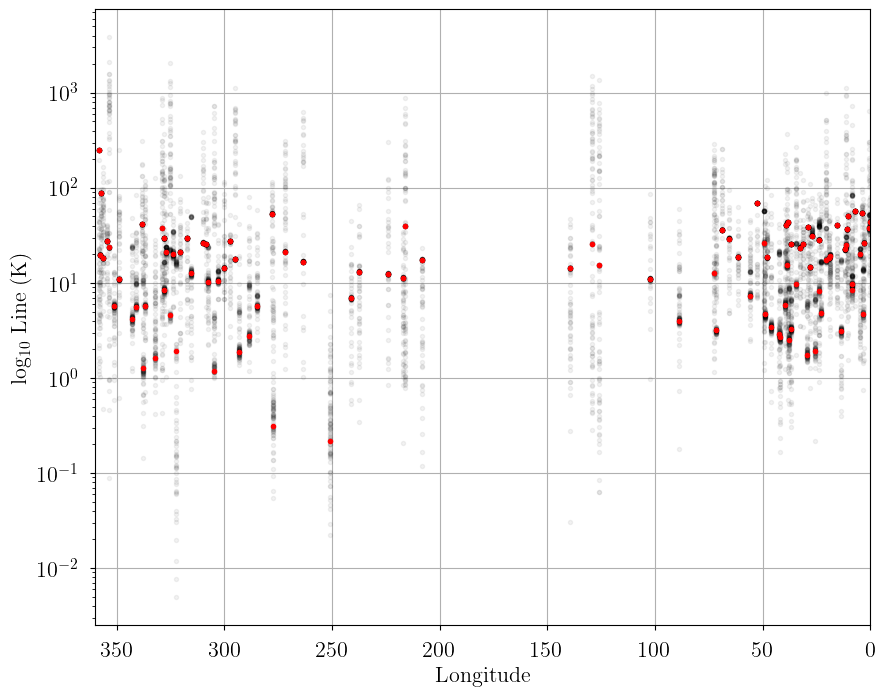

In [ ]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots(figsize=(10, 8))
for draw in posterior.posterior_predictive.draw:
    ax.plot(
        data["glong"],
        posterior.posterior_predictive["line"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["line"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("log$_{10}$ Line (K)")
ax.set_yscale("log")
ax.set_xlim(360.0, 0.0)

(360.0, 0.0)

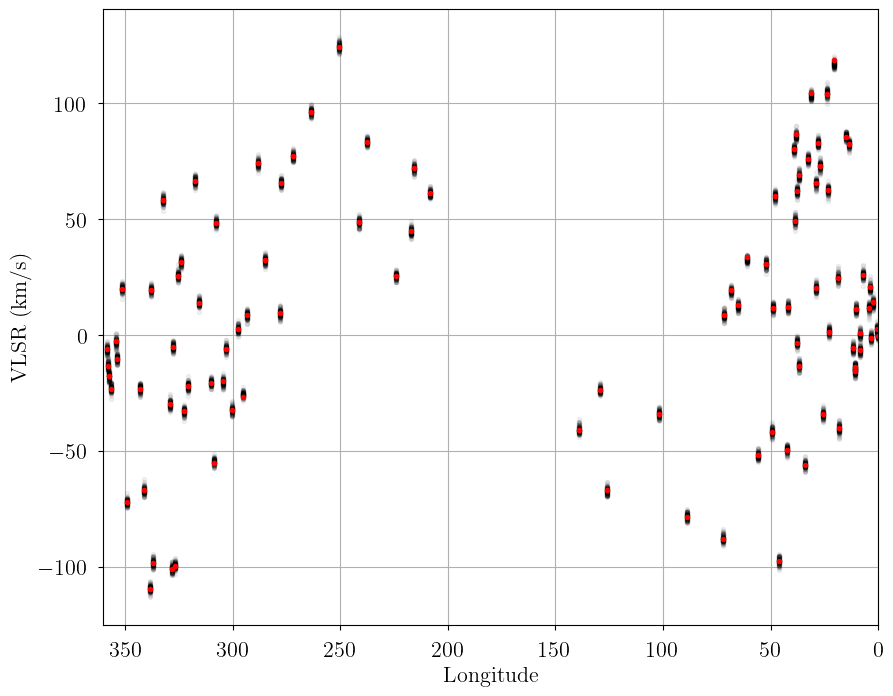

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in posterior.posterior_predictive.draw:
    ax.plot(
        data["glong"],
        posterior.posterior_predictive["vlsr"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["vlsr"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("VLSR (km/s)")
ax.set_xlim(360.0, 0.0)

(360.0, 0.0)

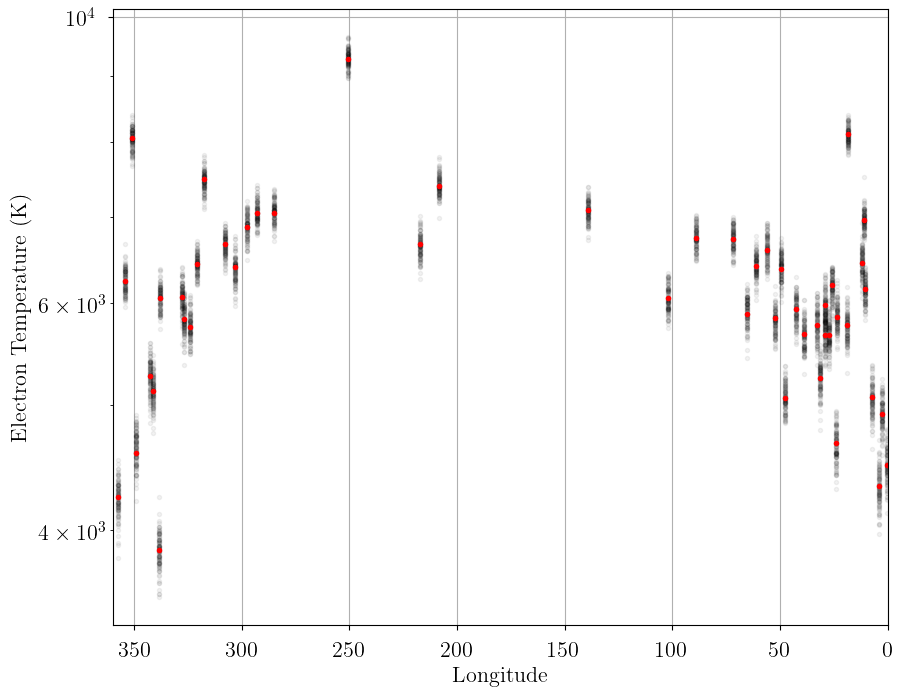

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in posterior.posterior_predictive.draw:
    ax.plot(
        data.loc[~data["te"].isna(), "glong"],
        posterior.posterior_predictive["te_observed"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["te"], "r.")
ax.set_yscale('log')
ax.set_xlabel("Longitude")
ax.set_ylabel("Electron Temperature (K)")
ax.set_xlim(360.0, 0.0)